# Линейная регрессия

**Линейная регрессия (Linear Regression)** - модель зависимости переменной от одной или нескольких других переменных(факторов, регрессоров, независимых переменных) с линейной функцией зависимости. $y$ = $k$x +$b$ \
$k$ - Коэффициент наклона\
$b$ - Смещение модели

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10, 10)
k = 2
b = 1

y = k*x +b

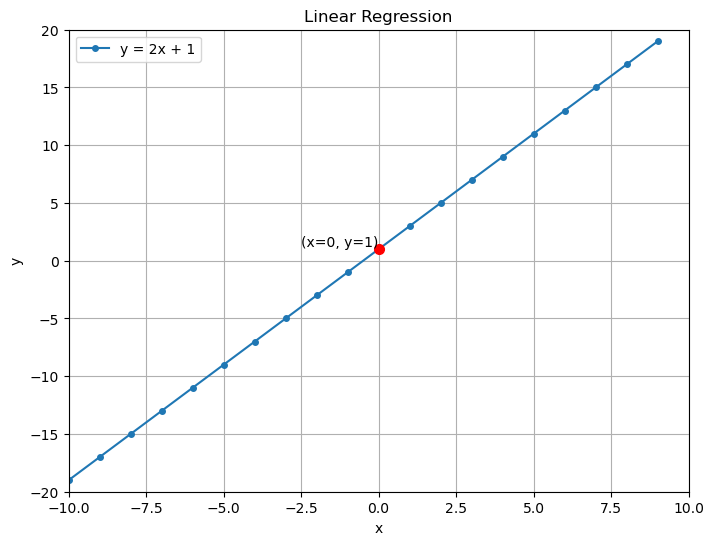

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'y = {k}x + {b}', marker='o', markersize=4)
plt.plot(0, b, color='r', marker='o', markersize=7)
plt.text(0, b, f'(x=0, y={b})', fontsize=10, ha='right', va='bottom')
plt.ylabel('y')
plt.xlabel('x')

plt.xlim(-10, 10)
plt.ylim(-20, 20)

plt.title('Linear Regression')
plt.legend()
plt.grid();

## Scikit-Learn Реализация

In [4]:
import numpy as np
import matplotlib.pyplot as plt

**make_regression** - функция для генерации случайных данных для задач линейной регрессии. \
Создаёт синтетические данные с зависимой переменной ( $y$ ), линейно зависящей от признаков ( $X$ ).\
Может добавлять шум (*noise*), смещение (*bias*), разреженность (*effective_rank*) и другие параметры.

In [5]:
from sklearn.datasets import make_regression

In [6]:
X, y = make_regression(n_samples=50,
                       n_features=1,
                       n_informative=1,
                       noise=10,
                       random_state=10)

In [7]:
display(X.T, y)

array([[-1.7433723 , -0.54930901, -0.00838385, -0.21269764,  0.00429143,
         0.22863013, -1.07980489,  0.19501328, -0.14742026,  1.3315865 ,
        -0.93943336, -0.48933722,  2.38496733,  0.31216994, -0.27124799,
         0.44513761,  0.13513688,  0.10854853,  0.40020999,  1.67262221,
         1.39799638,  0.66023155, -0.35087189, -0.96506567, -1.13660221,
        -0.47614201,  1.484537  , -0.7319695 ,  1.12369125, -0.33763234,
         0.09914922,  0.26607016, -0.80459114,  0.1327083 ,  1.30847308,
        -1.97772828,  0.61320418, -0.72008556,  1.20303737,  1.02827408,
         1.25647226,  0.71527897, -1.54540029, -0.17460021,  0.56515267,
         0.43302619, -0.33914025,  0.26551159, -0.26731719,  0.62133597]])

array([-1.68706711e+02, -5.42960922e+01, -1.55777592e+01, -1.95488208e+01,
       -6.10376671e+00,  8.48140541e+00, -1.20774961e+02,  2.58959378e+01,
       -2.04943884e+01,  1.44333642e+02, -1.10545314e+02, -4.27230118e+01,
        2.24949277e+02,  2.77292904e+01, -3.01980065e+01,  5.64869106e+01,
        1.66156788e+01,  1.16851526e+01,  5.44418963e+01,  1.49605786e+02,
        1.64281209e+02,  6.41864031e+01, -3.78138101e+01, -1.13298074e+02,
       -1.07558102e+02, -5.31022570e+01,  1.64702088e+02, -5.61160914e+01,
        1.14458125e+02, -3.52218796e+01, -1.58181127e-01,  1.74041721e+01,
       -5.89618892e+01, -5.54060451e+00,  1.55419387e+02, -1.70092432e+02,
        5.89406659e+01, -6.19333479e+01,  1.06538115e+02,  9.47028941e+01,
        1.30457427e+02,  6.89247198e+01, -1.46851089e+02, -1.94615860e+01,
        4.34191114e+01,  3.20839040e+01, -4.09892567e+01,  2.12956270e+01,
       -2.20713315e+01,  6.21526082e+01])

In [8]:
display(X.shape, y.shape)

(50, 1)

(50,)

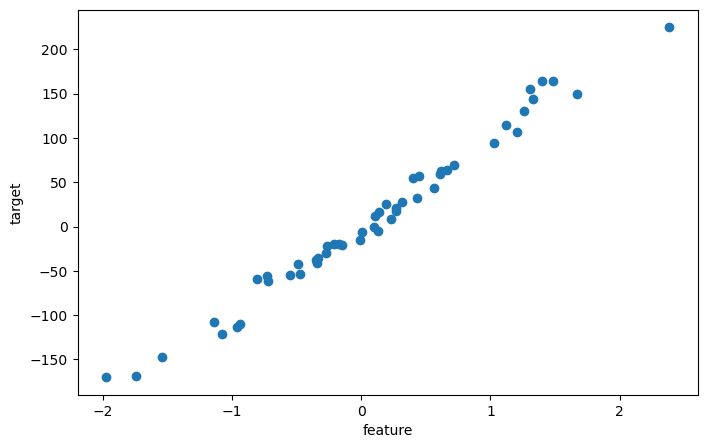

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target');

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model

LinearRegression()

Обучение модели. Передача входных данных методу **fit**

In [14]:
model.fit(X, y)

LinearRegression()

In [24]:
display(f'k - Коэффициент наклона: {model.coef_[0]}', f'b - Значение смещения(сдвиг): {model.intercept_}')

'k - Коэффициент наклона: 98.55398966378642'

'b - Значение смещения(сдвиг): -0.07937249432970006'

In [31]:
model_k = model.coef_[0]
model_b = model.intercept_

In [39]:
x = np.arange(-5, 5)
model_y = model_k * x + model_b

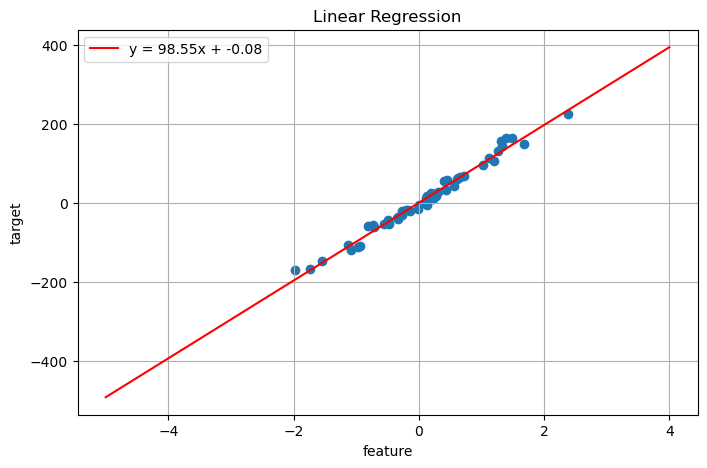

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(x, model_y, label=f'y = {model_k.round(2)}x + {model_b.round(2)}', color='r')
plt.scatter(X, y)

plt.legend()
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Linear Regression');

In [78]:
X[:1]

array([[-1.7433723]])

In [79]:
# Предсказание методом predict
model.predict(X[:1])

array([-171.89566772])

In [80]:
# Предсказание вручную подставлением в формулу линейной функции
model_k * X[:1] + model_b

array([[-171.89566772]])

In [81]:
# Результаты идентичны
model.predict(X[:1]) == model_k * X[:1] + model_b

array([[ True]])

Таблица сравнения значений предсказанных значений от целевых
- `X` - Точки по которым модель строилась
- `y` - Истинный результат y для X
- `model_predict` - значения y, предсказанные моделью

In [119]:
import pandas as pd

In [120]:
df = pd.DataFrame({'X':X[:, 0],
                  'y': y,
                  'model_predict': model.predict(X)})

In [121]:
df.head()

,X,y,model_predict
0,-1.743372,-168.706711,-171.895668
1,-0.549309,-54.296092,-54.215967
2,-0.008384,-15.577759,-0.905634
3,-0.212698,-19.548821,-21.041573
4,0.004291,-6.103767,0.343565


In [124]:
# Разница между предиктами от истинного значения
df['difference'] = df['model_predict'] - df['y']

In [126]:
df.head()

,X,y,model_predict,difference
0,-1.743372,-168.706711,-171.895668,-3.188957
1,-0.549309,-54.296092,-54.215967,0.080125
2,-0.008384,-15.577759,-0.905634,14.672125
3,-0.212698,-19.548821,-21.041573,-1.492753
4,0.004291,-6.103767,0.343565,6.447332


In [129]:
df['difference'].sum()/df.shape[0]

-3.126388037344441e-15

In [133]:
df['abs_diff'] = df['difference'].abs()

In [135]:
df.head()

,X,y,model_predict,difference,abs_diff
0,-1.743372,-168.706711,-171.895668,-3.188957,3.188957
1,-0.549309,-54.296092,-54.215967,0.080125,0.080125
2,-0.008384,-15.577759,-0.905634,14.672125,14.672125
3,-0.212698,-19.548821,-21.041573,-1.492753,1.492753
4,0.004291,-6.103767,0.343565,6.447332,6.447332


In [136]:
df['abs_diff'].sum()/len(df)

9.218743169123409

**MAE (Mean Absolute Error)** - Средняя абсолютная ошибка

In [131]:
from sklearn.metrics import mean_absolute_error

In [137]:
MAE = mean_absolute_error(df['y'], df['model_predict'])
MAE

9.218743169123409

**MSE (Mean Squared Error)** - Средне-квадратичная ошибка

In [128]:
MSE = np.mean(df['difference']**2)
MSE

134.32017702775374

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error(df['y'], df['model_predict'])

134.32017702775374

**RMSE**

**R2**